<a href="https://colab.research.google.com/github/KernAlexandr/KernAlexandr/blob/main/Creative%20task%20%E2%84%961%20%20Titanic%20survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используется датасет: https://www.kaggle.com/c/titanic/data

In [ ]:
import pandas as pd # библиотека для работы с дата фреймами
import numpy as np # библиотека для работы с массивами

from sklearn.metrics import accuracy_score # Метрика Проверка точности модели
from sklearn.metrics import classification_report # Отчёт по метрикам (precision, recall, f1-score)
from sklearn.metrics import confusion_matrix # Метрика для построения матриц ошибок
from sklearn.metrics import precision_score # Метрика (Точность)
from sklearn.metrics import recall_score # Метрика (Полнота)
from sklearn.metrics import f1_score # Метрика (F1 мера)

# импорт библиотек для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Отключим предупреждения Python, чтобы не захламлять лишним выводом наш Блокнот
import warnings
warnings.filterwarnings('ignore')

## Загрузим все необходимые файлы (датасеты) для работы

In [ ]:
# Создаем дата фрейм из загруженного датасета обучающих данных train.csv
df_train = pd.read_csv('/content/Titanic/train.csv')

In [ ]:
# Создаем дата фрейм из загруженного датасета тестируемых данных test.csv
df_test = pd.read_csv('/content/Titanic/test.csv')

In [ ]:
# Создаем дата фрейм из загруженного датасета классификации тестовых данных данных gender_submission.csv
df_gs = pd.read_csv('/content/Titanic/gender_submission.csv')

## 1. Исследуем и подготавливаем датасеты
### Тренировочный датасет Пассажиров Титаника


In [ ]:
# Выведем общую информацию об дата фрейме
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Дата фрейм `df_train` представляет собой таблицу, состоящую из 12 столбцов и 891 записи о пассажирах

Названия столбцов:

1) PassengerId - **ИД пассажира**,

2) Survived - Выжил (**0 - НЕТ, 1 - ДА**),

3) Pclass - **Социально-экономический статус  (1, 2, 3)**, самый высокий 1

4) Name - Имя пассажира,

5) Sex - **Пол пассажира**,

6) Age - **Возраст пассажира в годах**,

7) SibSp - **Количество братьев и сестер/супругов на борту Титаника**,

8) Parch - **Количество родителей/детей на борту Титаника**,

9) Ticket - Номер билет,

10) Fare - Стоимость проезда,

11) Cabin - **Номер каюты**,

12) Embarker - Порт отправления (C = Шербур, Q = Квинстаун, S = Саутгемптон)


In [ ]:
# Исследуем пустые значения
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Наблюдаем, что данных в столбцах:
- **Age - 714**
- **Cabin - 204**
- **Embarked - 889**

Меньше общего числа пассажиров **891**, это говорит о том, что признаки: Возраст, Номер кабины, Порт отправления, есть не у всех пассажиров.

Тем самым, некоторыми данными для обучения модели, **возможно**, придется пренебречь

In [ ]:
#Сделаем столбец PassengerId индексным
df_train.set_index('PassengerId', inplace=True)

In [ ]:
# Проверим на дубликаты
df_train.duplicated().sum()

np.int64(0)

In [ ]:
# Исследуем голову
df_train.head(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


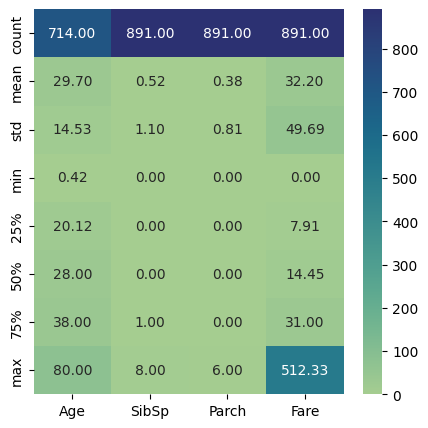

In [ ]:
#визуализируем статистические данные по числовым столбцам
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_train[['Age','SibSp','Parch','Fare']].describe(), annot = True, fmt= '.2f', cmap='crest')
plt.show()

Проанализировав таблицу, заметим, что:
- Средний возраст пассажиров был около 30
- Среднее колличество родственников на человека примерно 1
- Средняя цена билета 32.2

In [ ]:
# Смотрим количество уникальных значений в столбцах
df_train.nunique()

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


Заменим данные в ячейках на числовые : SEX (male - 1, female - 2) , Embarked (C - 1, Q - 2, S - 3)

In [ ]:
#Заменяем данные в ячейках на числовые с преобразованием типа данных на int и заменой
df_train['Sex'] = df_train['Sex'].replace({'male': 1, 'female': 2}).astype(int)
df_train['Embarked'] = pd.to_numeric(df_train['Embarked'].replace({'C': 1, 'Q': 2, 'S': 3}), errors='coerce').fillna(0).astype(int)

Удалим признаки, на мой взгляд, не такие важные: Имя, Номер билета, Номер Каюты

In [ ]:
# Удалим столбцы
df_train = df_train.drop(['Name','Ticket','Cabin'], axis=1)

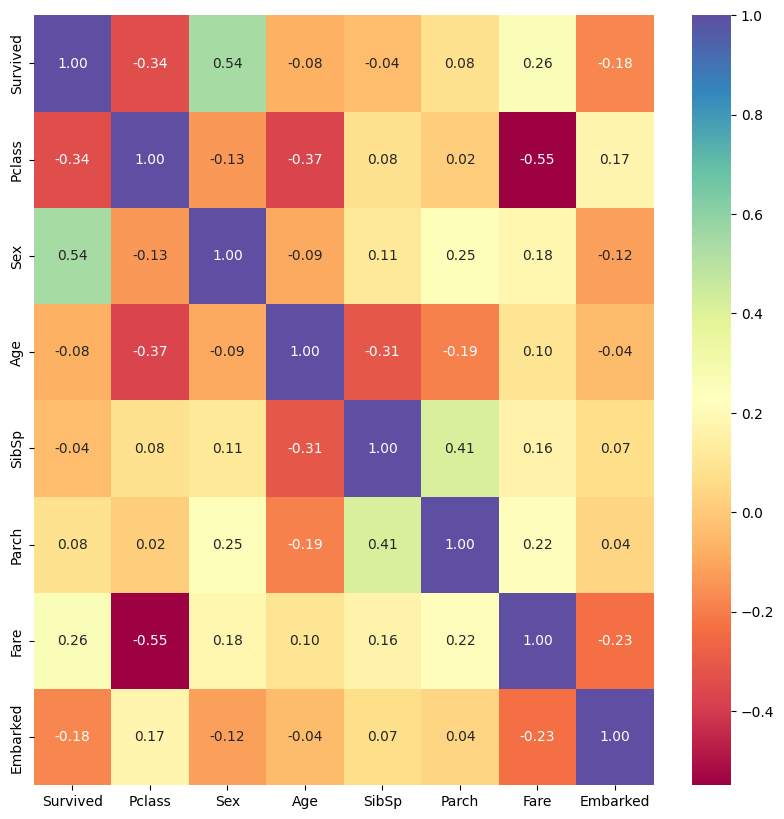

In [ ]:
# Визуализируем корреляцию
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot = True, fmt= '.2f', cmap='Spectral')
plt.show()

Проанализировав таблицу корреляции данных, можно сказать что, **Survived** коррелирует с признаками: **Sex , Pclass, Fare** .

Проанализируем баланс классов выживших и нет

In [ ]:
# Создадим новый дата фрейм с подсчетом выживших и нет
df_survived = df_train.Survived.value_counts()
df_survived.head()

,count
Survived,
0,549
1,342


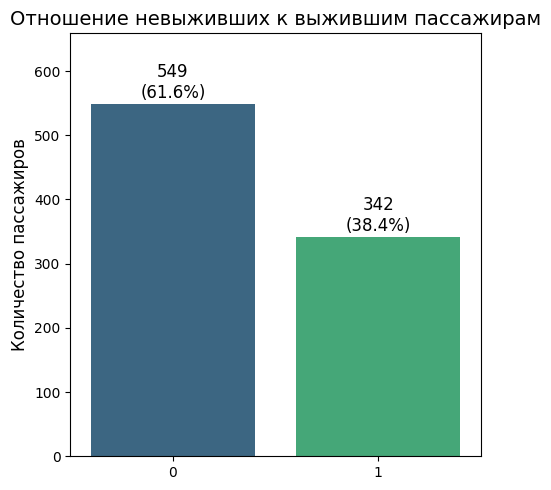

In [ ]:
# Строим график с подсчетом выживших, и нет
plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x=df_survived.index,
    y=df_survived.values,
    palette="viridis",
    order=df_survived.index  # Важно: явно задаём порядок!
)

# Заголовки и подписи осей
plt.title('Отношение невыживших к выжившим пассажирам', fontsize=14)
plt.xlabel('')
plt.ylabel('Количество пассажиров', fontsize=12)

# Считаем проценты
total = sum(df_survived.values)
percentages = [f'{(y/total)*100:.1f}%' for y in df_survived.values]

# Добавляем подписи
for bar, y, percent in zip(ax.patches, df_survived.values, percentages):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-центр столбца
        height + 0.01 * total,              # y-позиция (чуть выше вершины)
        f"{y}\n({percent})",                # текст (значение + процент)
        ha='center',
        fontsize=12
    )

plt.ylim(0, max(df_survived.values) * 1.2)  # Запас для подписей
plt.tight_layout()
plt.show()

Наблюдаем дисбаланс классов, выживших примерно в 2 раза меньше, чем тех кто не выжил

Попробуем пронаблюдать какие зависимости признаков выживаемости на Титанике

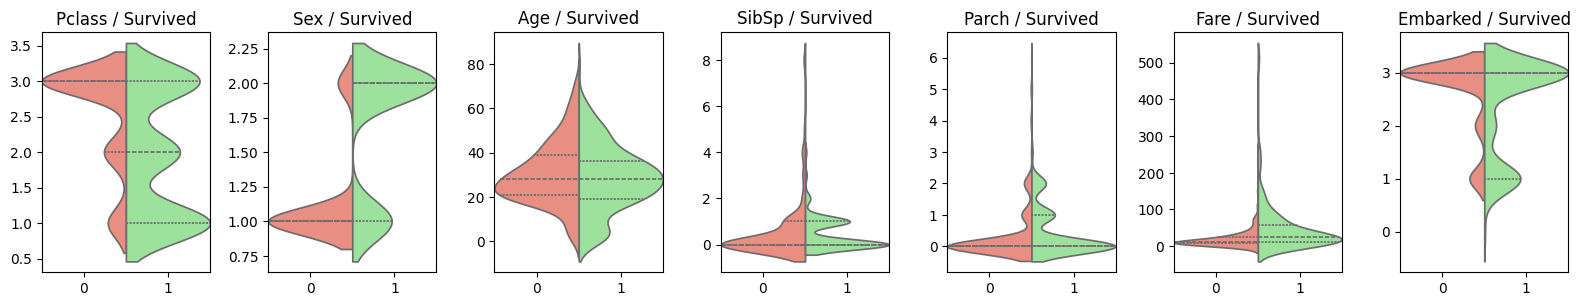

In [ ]:
# Убираем 'Survived' из списка признаков
features = df_train.columns.drop('Survived')

# Создаем сетку графиков (1 строка x 7 колонок, всего 7 мест)
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16, 3))  # Можно подобрать размер
fig.tight_layout(pad=1.1)  # Отступы между графиками

# Проходим по всем признакам и рисуем violinplot
for i, feature in enumerate(features):
    col = i   # Номер колонки (0-6)
    ax = axes[col]


    sns.violinplot(
        x='Survived',
        y=feature,
        data=df_train,
        ax=ax,
        palette={'0': "salmon", '1': "lightgreen"},
        inner="quart",
        split=True, # берет только половину графика
        width=1.0 # убираем отступ между "скрипками"
    )
    ax.set_title(f'{feature} / Survived')
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.show()

Проанализировав зависимости признаков выживаемости на Титанике сделаем следующие выводы:

1) Чем выше Социально-экономический статус тем больше шансов выжить

2) У женщин выжить шансов в 2 раза больше чем у мужчин

3) Детей спасали чаще чем взрослых

4) Количество братьев и сестер/супругов на борту Титаника не сильно сказалось на выживаемости,

5) Возможно маленьких детей с родителями спасали в первую очередь, так как спасенных, больше чем неспасенных.

6) Чем дороже билет тем больше шансов на выживание

7) У севших на корабль в порту "C = Шербур" шансов выжить больше чем у других

## 2. Подготовим данные для обучения модели

Так как мы в тренировочном датасете, все используемые данные уже представили в числовом формате, а признаки, которые на наш взгляд не являются значимыми, удалили, то осталось разобраться с пропущенными записями о возврасте.

Мы выявили, что возраст имеет значения в выживаемости, пропуски составляют 177 значений, что составляет 1/5 часть от дата сета, тем самым делаем вывод, что удалять строки с пропущенным возрастом не очень хорошая идея. Необходимо заполнить данные пропуски.

Посмотрим зависимость пассажиров с неуказанными возрастами к другим признакам

In [ ]:
df_train[df_train['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
6,0,3,1,NaN,0,0,8.4583,2
18,1,2,1,NaN,0,0,13.0000,3
20,1,3,2,NaN,0,0,7.2250,1
27,0,3,1,NaN,0,0,7.2250,1
29,1,3,2,NaN,0,0,7.8792,2
...,...,...,...,...,...,...,...,...
860,0,3,1,NaN,0,0,7.2292,1
864,0,3,2,NaN,8,2,69.5500,3
869,0,3,1,NaN,0,0,9.5000,3


In [ ]:
print(df_train[df_train['Age'].isna()].mean())

Survived     0.293785
Pclass       2.598870
Sex          1.299435
Age               NaN
SibSp        0.564972
Parch        0.180791
Fare        22.158567
Embarked     2.293785
dtype: float64


Проанализировав Пассажиров с пропусками возраста можно сделать следующие выводы:
- Соотношение выживаемости 1 к 3 (выжил/нет)
- Социально-экономический статус ближе к 3
- Больше мужчин не указывали возраст
- Практически не имели родственников на борту
- Стоимость билета ниже средней по борту 22.15 против 32.20
- Большая часть пассажиров села на борт в портах: Q = Квинстаун, S = Саутгемптон

Как мы видим удалять строки с пропусками возрастов негативно скажется на обучении модели.

Поэтому попробуем заполнить пропуски средними значения по группам признаков , до тех пор пока не заполним все пропуски

In [ ]:
# создадим копию фрейма, на случай если наш эксперимент даст плохие результаты
df_train1 = df_train.copy()

In [ ]:
# Заполняем медианой по группам 'Pclass', 'Sex'
df_train1['Age'] = df_train1.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# проверяем остались ли еще пустые значения
df_train1[df_train1['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,


In [ ]:
df_train1.head(900)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,3
2,1,1,2,38.0,1,0,71.2833,1
3,1,3,2,26.0,0,0,7.9250,3
4,1,1,2,35.0,1,0,53.1000,3
5,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,3
888,1,1,2,19.0,0,0,30.0000,3
889,0,3,2,21.5,1,2,23.4500,3


In [ ]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Подготовим тестовые датасеты

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
df_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
#Сделаем столбцы PassengerId индексным
df_test.set_index('PassengerId', inplace=True)
df_gs.set_index('PassengerId', inplace=True)

In [ ]:
# Склеим тестовые признаки и классы
df_test1 = df_test.join(df_gs, how ='left')

Выполним все теже преобразования для тестовой быборки, что и для обучающей

In [ ]:
#Заменяем данные в ячейках на числовые с преобразованием типа данных на int и заменой
df_test1['Sex'] = df_test1['Sex'].replace({'male': 1, 'female': 2}).astype(int)
df_test1['Embarked'] = pd.to_numeric(df_test1['Embarked'].replace({'C': 1, 'Q': 2, 'S': 3}), errors='coerce').fillna(0).astype(int)

# Удалим столбцы
df_test1 = df_test1.drop(['Name','Ticket','Cabin'], axis=1)

In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


In [ ]:
# заменим единственный пропуск стоимости билета на 0
df_test1['Fare'] = df_test1['Fare'].fillna(0)

In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


In [ ]:
# создадим копии фрейма, на случай если наш эксперимент даст плохие результаты
df_test2 = df_test1.copy()
df_test3 = df_test1.copy()

In [ ]:
# Заполняем медианой по группам 'Pclass', 'Sex'
df_test2['Age'] = df_test2.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


In [ ]:
# выведем строки со значением nan если имеются
print(df_test2[df_test2.isna().any(axis=1)])

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Survived]
Index: []


In [ ]:
# этом датасете удалим все записи с пропусками возраста
df_test3 = df_test3.dropna()
df_test3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 892 to 1307
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    332 non-null    int64  
 1   Sex       332 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     332 non-null    int64  
 4   Parch     332 non-null    int64  
 5   Fare      332 non-null    float64
 6   Embarked  332 non-null    int64  
 7   Survived  332 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.3 KB


In [ ]:
print(df_test3[df_test3.isna().any(axis=1)])

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Survived]
Index: []


Подготовим наши признаки и классы для тестирования моделей

In [ ]:
# Создадим переменную признаков для обучения моделей
X_train = df_train1.drop(columns=['Survived'])
# Создадим переменную классов для обучения моделей
y_train = df_train1.Survived

In [ ]:
# Создадим переменную признаков для тестирования моделей
X_test = df_test2.drop(columns=['Survived'])
# Создадим переменную классов для тестирования моделей
y_test = df_test2.Survived

Также, для лучшей сходимости некоторых моделей, преобразуем наши числовые признаки в значения в интервале **от 0 до 1** с помощью `MinMaxScaler` так как значения признаков у нас положительные

In [ ]:
from sklearn.preprocessing import MinMaxScaler # будем использовать библиотеку для преобразования значения признаков с целью лучшей сходимости моделей

In [ ]:
# инициализируем MinMaxScaler, чтобы все значения признаков были представлены вектором, со значениями в диапозоне от 0 до 1 (так как все значения признаков положительные)
scaler = MinMaxScaler((0,1))
# применяем приобразование от -1 до 1 к нашим данным
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.fit_transform(X_test)

In [ ]:
# Разобьем наши тренировочные данные на тренировочные и валидационные для настройки гиперпараметров
from sklearn.model_selection import train_test_split # создает наборы данных для обучения и тестирования модели
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_1, y_train, test_size = 0.1, random_state = 2, stratify = y_train)

После разбивки данных у нас получились следующие наборы:

Тренировочный дата сет поделен на тренировочные и валидационные выборки
- Тренировочные `X_train_split, y_train_split`
- Валидационные `X_val_split, y_val_split`
- Тестовые `X_test_1, y_test`
Признаки нормализованы в диапозоне **от 0 до 1**

Или

Тренировочный датасет не поделен
- Тренировочные `X_train_1, y_train`
- Тестовые `X_test_1, y_test`
Признаки нормализованы в диапозоне **от 0 до 1**

Или
- Тренировочные `X_train, y_train`
- Тестовые `X_test_1, y_test`
Признаки не нормализованы

## 3. Ищем и обучаем наиболее, подходящие модели алгоритмов

Так как наша задача - определить классы выживших, то будем использовать алгоритмы классического машинного обучения, для задач классификации.

Настраивая их параметры и получая лучшие результаты, будем сравнивать, какая модель лучше покажет себя в решении поставленной задачи

1) Логистическая регрессия (Logistic Regression) – простая линейная модель для бинарной классификации.

In [ ]:
from sklearn.linear_model import LogisticRegression
# Инициализируем модель и настраиваем ее параметры
model_LR = LogisticRegression(
#     penalty = 'l2', # по умолчанию с 'liblinear'
#    dual = True,
#     C = 0.5, #
#    fit_intercept = ,
#    intercept_scaling = ,
#    class_weight = ,
#    random_state = ,
#     solver = 'newton-cg', # сильно повлиял на точность
#     max_iter = 100, #
#    multi_class = 'ovr',
#    verbose = ,
#    warm_start = ,
#    n_jobs = ,
#    l1_ratio = ,
    )
# Обучаем на подготовленных данных
model_LR.fit(X_train_split, y_train_split)
# Предсказываем на валидационной выборке
y_pred_LR = model_LR.predict(X_val_split)
# Определим точность
accuracy = accuracy_score(y_val_split, y_pred_LR)
print(f'Точность модели с алгоритмом LogisticRegression на валидационной выборке составляет {accuracy*100:.2f}%')
# Матрица ошибок
cm_LR_1 = confusion_matrix(y_val_split, y_pred_LR)
print('Матрица ошибок:\n', cm_LR)
#precision_LR = precision_score(y_val_split, y_pred_LR)
#print(f'Точность = {precision_LR*100:.2f}%')
#recall_LR = recall_score(y_val_split, y_pred_LR)
#print(f'Полнота = {recall_LR*100:.2f}%')
#f1_LR = f1_score(y_val_split, y_pred_LR)
#print(f'F1-мера = {f1_LR*100:.2f}%')
#val_score = model_LR.score(X_val_split, y_val_split)
#print(f'     {val_score*100:.2f}%')

Точность модели с алгоритмом LogisticRegression на валидационной выборке составляет 85.56%
Матрица ошибок:
 [[50  5]
 [ 8 27]]
Точность = 84.38%
Полнота = 77.14%
F1-мера = 80.60%


In [ ]:
# оставил кросс валидацию, так как поделил данные сам на тренировочные , валидационные и тестовые
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

scores = cross_val_score(model_LR, X_train_1, y_train, cv=StratifiedKFold(n_splits=5))  # cv=5 → 5 фолдов
print("Средняя точность:", scores.mean())

Средняя точность: 0.7934969556211161


In [ ]:
# Предсказываем на тестовой выборке
y_pred_LR_test = model_LR.predict(X_test_1)
# Определим точность
accuracy_LR = accuracy_score(y_test, y_pred_LR_test)
print(f'Точность модели с алгоритмом LogisticRegression на тестовой выборке составляет {accuracy_LR*100:.2f}%')
cm_LR = confusion_matrix(y_test, y_pred_LR_test)
print('Матрица ошибок:\n', cm_LR)
precision_LR = precision_score(y_test, y_pred_LR_test)
print(f'Точность = {precision_LR*100:.2f}%')
recall_LR = recall_score(y_test, y_pred_LR_test)
print(f'Полнота = {recall_LR*100:.2f}%')
f1_LR = f1_score(y_test, y_pred_LR_test)
print(f'F1-мера = {f1_LR*100:.2f}%')

Точность модели с алгоритмом LogisticRegression на тестовой выборке составляет 94.02%
Матрица ошибок:
 [[250  16]
 [  9 143]]
Точность = 89.94%
Полнота = 94.08%
F1-мера = 91.96%


2) Градиентный бустинг (Gradient Boosting)

In [ ]:
# Модель классификатор градиентного бустинга (Gradient Boosting)
from xgboost import XGBClassifier
# Инициализируем модель и настраиваем ее параметры
model_XGB = XGBClassifier(n_estimators=250, max_depth=2, learning_rate=0.2, subsample=0.6, colsample_bytree=0.2, random_state = 2)
# Обучаем на подготовленных данных
model_XGB.fit(X_train_1, y_train)
# Предсказываем на тестовой выборке
y_pred_XGB = model_XGB.predict(X_test_1)
# Определим точность
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print(f'Точность модели с алгоритмом XGB на тестовой выборке составляет {accuracy_XGB*100:.2f}%')
# Матрица ошибок
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
print('Матрица ошибок:\n', cm_XGB)
precision_XGB = precision_score(y_test, y_pred_XGB)
print(f'Точность = {precision_XGB*100:.2f}%')
recall_XGB = recall_score(y_test, y_pred_XGB)
print(f'Полнота = {recall_XGB*100:.2f}%')
f1_XGB = f1_score(y_test, y_pred_XGB)
print(f'F1-мера = {f1_XGB*100:.2f}%')

Точность модели с алгоритмом XGB на тестовой выборке составляет 94.74%
Матрица ошибок:
 [[255  11]
 [ 11 141]]
Точность = 92.76%
Полнота = 92.76%
F1-мера = 92.76%


3) Случайный лес (RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Инициализируем модель и настраиваем ее параметры
model_RFC = RandomForestClassifier(n_estimators=175, max_depth=4)
# Обучаем на подготовленных данных
model_RFC.fit(X_train_1,y_train)
# Предсказываем на тестовой выборке
y_pred_RFC = model_RFC.predict(X_test_1)
# Определим точность
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f'Точность модели с алгоритмом RandomForestClassifier составляет {accuracy*100:.2f}%')
# Матрица ошибок
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print(cm_RFC)
precision_RFC = precision_score(y_test, y_pred_RFC)
print(f'Точность = {precision_RFC*100:.2f}%')
recall_RFC = recall_score(y_test, y_pred_RFC)
print(f'Полнота = {recall_RFC*100:.2f}%')
f1_RFC = f1_score(y_test, y_pred_RFC)
print(f'F1-мера = {f1_RFC*100:.2f}%')

Точность модели с алгоритмом RandomForestClassifier составляет 85.56%
[[258   8]
 [ 28 124]]
Точность = 93.94%
Полнота = 81.58%
F1-мера = 87.32%


4) Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC
# Инициализируем модель и настраиваем ее параметры
model_SVC = SVC(kernel='rbf')
# Обучаем на подготовленных данных
model_SVC.fit(X_train_1, y_train)
# Предсказываем на тестовой выборке
y_pred_SVC = model_SVC.predict(X_test_1)
# Определим точность
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print(f'Точность модели с алгоритмом SVC составляет {accuracy*100:.2f}%')
# Матрица ошибок
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
print(cm_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC)
print(f'Точность = {precision_SVC*100:.2f}%')
recall_SVC = recall_score(y_test, y_pred_SVC)
print(f'Полнота = {recall_SVC*100:.2f}%')
f1_SVC = f1_score(y_test, y_pred_SVC)
print(f'F1-мера = {f1_SVC*100:.2f}%')

Точность модели с алгоритмом SVC составляет 85.56%
[[266   0]
 [ 24 128]]
Точность = 100.00%
Полнота = 84.21%
F1-мера = 91.43%


5) Наивный Байес (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Инициализируем модель и настраиваем ее параметры
model_GNB = GaussianNB()
# Обучаем на подготовленных данных
model_GNB.fit(X_train,y_train)
# Предсказываем на тестовой выборке
y_pred_GNB = model_GNB.predict(X_test)
# Определим точность
accuracy_GNB = accuracy_score(y_test, y_pred_GNB)
print(f'Точность модели с алгоритмом GaussianNB составляет {accuracy*100:.2f}%')
# Матрица ошибок
cm_GNB = confusion_matrix(y_test, y_pred_GNB)
print(cm_GNB)
precision_GNB = precision_score(y_test, y_pred_GNB)
print(f'Точность = {precision_GNB*100:.2f}%')
recall_GNB = recall_score(y_test, y_pred_GNB)
print(f'Полнота = {recall_GNB*100:.2f}%')
f1_GNB = f1_score(y_test, y_pred_GNB)
print(f'F1-мера = {f1_GNB*100:.2f}%')

# ps модель лучше обучается на данных до обработки MinMaxScaler

Точность модели с алгоритмом GaussianNB составляет 85.56%
[[231  35]
 [  7 145]]
Точность = 80.56%
Полнота = 95.39%
F1-мера = 87.35%


6) Метод k-ближайших соседей (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Инициализируем модель и настраиваем ее параметры
model_KNN = KNeighborsClassifier(n_neighbors=5)
# Обучаем на подготовленных данных
model_KNN.fit(X_train, y_train)
# Предсказываем на тестовой выборке
y_pred_KNN = model_KNN.predict(X_test)
# Определим точность
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f'Точность модели с алгоритмом KNN составляет {accuracy*100:.2f}%')
# Матрица ошибок
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
print(f'Точность = {precision_KNN*100:.2f}%')
recall_KNN = recall_score(y_test, y_pred_KNN)
print(f'Полнота = {recall_KNN*100:.2f}%')
f1_KNN = f1_score(y_test, y_pred_KNN)
print(f'F1-мера = {f1_KNN*100:.2f}%')
# ps модель лучше обучается на данных до обработки MinMaxScaler

Точность модели с алгоритмом KNN составляет 85.56%
[[190  76]
 [ 67  85]]
Точность = 52.80%
Полнота = 55.92%
F1-мера = 54.31%


## 4. Визуализируем результаты

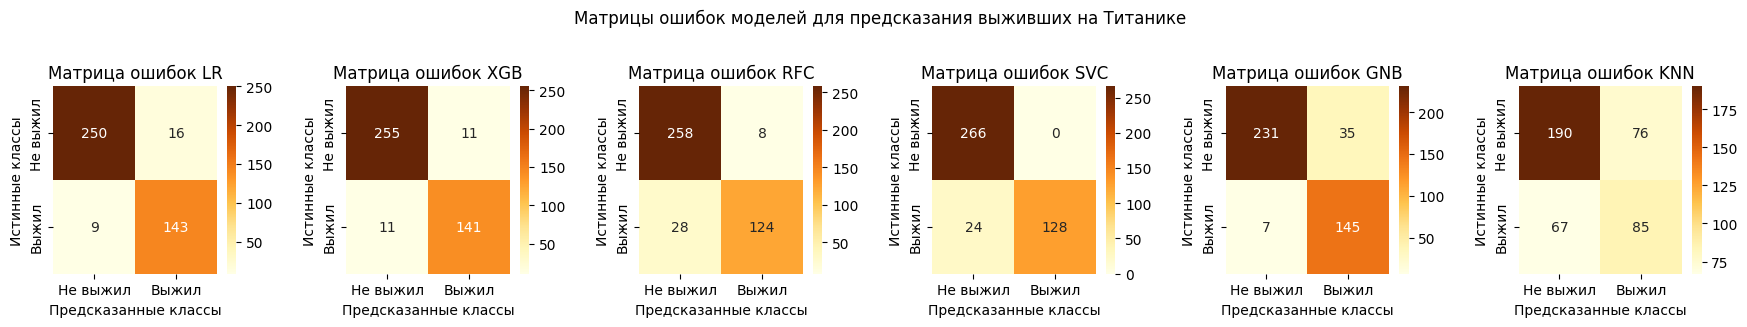

In [ ]:
# Визуализируем матрицы ошибок
cm_list = [cm_LR, cm_XGB, cm_RFC, cm_SVC, cm_GNB, cm_KNN] #тут храним названия переменных, в которых хранятся матрицы ошибок всех моделей

model_names = ['LR', 'XGB', 'RFC', 'SVC', 'GNB', 'KNN'] # подписи к моделям

# Создаем сетку графиков (1 строка x 6 колонок, всего 6 мест)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))  # Можно подобрать размер
fig.tight_layout(pad=3)  # Отступы между графиками

for i, (cm, name) in enumerate(zip(cm_list, model_names)):
    ax = axes[i] # номер колонки
    sns.heatmap(
        cm,
        fmt ='d',
        annot = True,
        cmap = "YlOrBr",
        xticklabels = ['Не выжил','Выжил'],
        yticklabels = ['Не выжил','Выжил'],
        ax=ax
    )
    ax.set_title(f"Матрица ошибок {name}")
    ax.set_xlabel("Предсказанные классы")
    ax.set_ylabel("Истинные классы")
plt.suptitle("Матрицы ошибок моделей для предсказания выживших на Титанике", y=1.1)
plt.show()

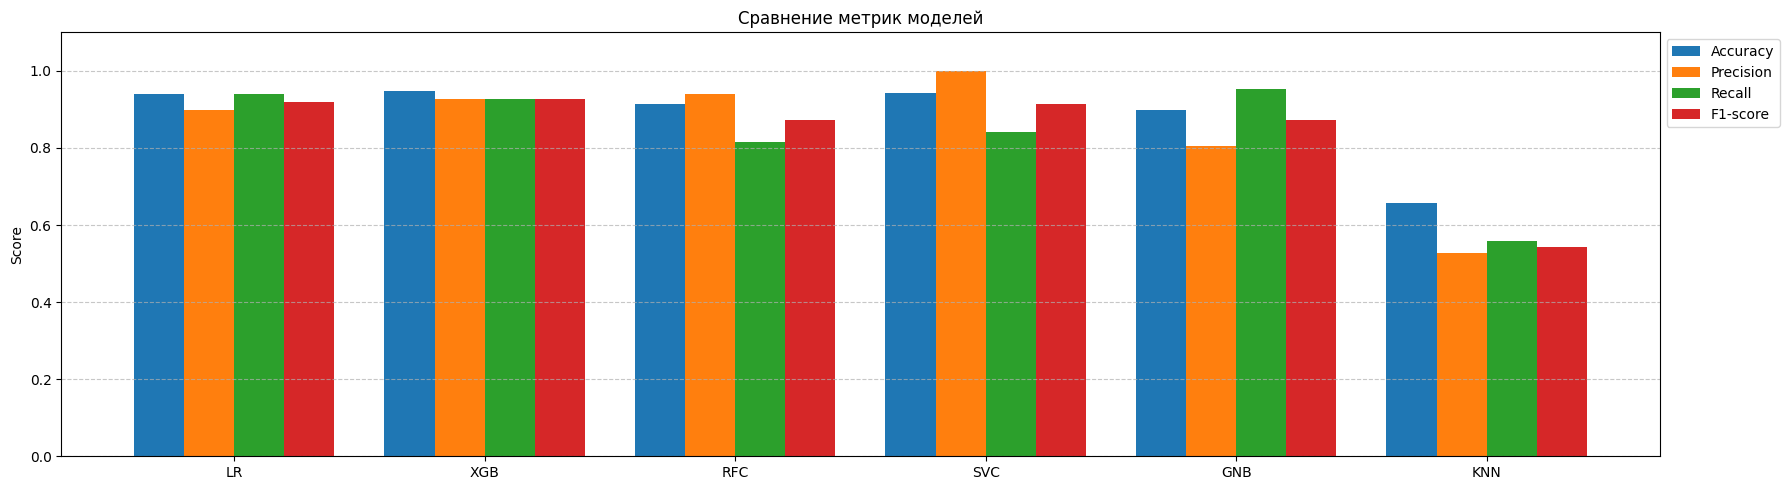

In [ ]:
#Визуализируем точность и другие метрики
accuracy_list = [accuracy_LR, accuracy_XGB, accuracy_RFC, accuracy_SVC, accuracy_GNB, accuracy_KNN]
precision_list = [precision_LR, precision_XGB, precision_RFC, precision_SVC, precision_GNB, precision_KNN]
recall_list = [recall_LR, recall_XGB, recall_RFC, recall_SVC, recall_GNB, recall_KNN]
f1_list = [f1_LR, f1_XGB, f1_RFC, f1_SVC, f1_GNB, f1_KNN]

model_names = ['LR', 'XGB', 'RFC', 'SVC', 'GNB', 'KNN']
metrics = {
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-score': f1_list
}

x = np.arange(len(model_names))  # позиции для меток моделей
width = 0.2  # ширина столбцов

fig, ax = plt.subplots(figsize=(18, 5))

# Создаем столбцы для каждой метрики
for i, (metric_name, metric_values) in enumerate(metrics.items()):
    offset = width * i
    ax.bar(x + offset, metric_values, width, label=metric_name)

# Настройки графика
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(model_names)
ax.set_ylabel('Score')
ax.set_title('Сравнение метрик моделей')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.1)  # Метрики обычно в диапазоне [0, 1]

plt.tight_layout()
plt.show()

## 4. Итоговые выводы по проведенному исследованию (Пассажиры на Титанике)
###1. Исследование данных
- Набор данных состоит из 3х дата сетов:
    - 1 датасет `df_train` содержит данные для тренировки моделей  и состоит из 891 записи о пассажирах с 10 признаками
    - 2 датасет `df_test` содержит тестовые данные, состоящий  из 418 записей о пассажирах
    - 3 датасет содержит классы пассажиров тестовых данных

- Признаки влючают **10 параметров**:
    - **Социально-экономический статус  (1, 2, 3), самый высокий 1**,
    - Имя пассажира,
    - **Пол пассажира,**
    - **Возраст пассажира в годах,**
    - **Количество братьев и сестер/супругов на борту Титаника,**
    - **Количество родителей/детей на борту Титаника,**
    - Номер билет,
    - **Стоимость проезда,**
    - Номер каюты,
    - **Порт отправления (C = Шербур, Q = Квинстаун, S = Саутгемптон)**
- Наблюдается **дисбаланс классов** в тренировочной выборке:
    - **61.6% (549 человек)** - Не выжил (статус `0`),
    - **38.4% (342 человек)** - Выживший (статус `1`).
###2. Предобработка данных
- Дубликатов не обнаружено.
- Для обучения моделей были исключены следующие признаки:
    - Имя пассажира,
    - Номер билет,
    - Номер каюты.
- Были пропущены значения **возраста пассажира в годах('Age')**, так как признак значимый, было принято решение заполнить пропуски средними значениями по группированным признакам: **пол пассажира, Социально-экономический статус('Sex', 'Pclass')**
- Для борьбы с дисбалансом применены:
    - `stratify = y_train` при разделении данных,
- Признаки маштабированы до диапазона `[0,1]` с помощью `MinMaxScaler` для улучшения сходимости моделей.
- Данные представлены в следующих наборах (для различных моделей свои предобработанные данные):
    - Тренировочный дата сет поделен на тренировочные и валидационные выборки
        - Тренировочные `X_train_split, y_train_split`
        - Валидационные `X_val_split, y_val_split`
        - Тестовые `X_test_1, y_test`
        - Признаки нормализованы в диапозоне **от 0 до 1**
    - Тренировочный датасет не поделен
        - Тренировочные `X_train_1, y_train`
        - Тестовые `X_test_1, y_test`
        - Признаки нормализованы в диапозоне **от 0 до 1**
    - Признаки тренировочного дата сета не маштабированы
        - Тренировочные `X_train, y_train`
        - Тестовые `X_test_1, y_test`
###3. Анализ корреляций и зависимостей
- Наибольшая корреляция с целевой переменной `'Survived'`:
    - `Sex` (0,54),
    - `Pclass` (-0,34),
    - `Fare` (0,26).
- **Скрипичные графики** подтвердили , что выживаемость пассажиров зависила от следующих признаков:
    - Чем выше Социально-экономический статус тем больше шансов выжить,
    - У женщин выжить шансов в 2 раза больше чем у мужчин,
    - Детей спасали чаще чем взрослых,
    - Возможно маленьких детей с родителями спасали в первую очередь,
    - Чем дороже билет тем больше шансов на выживание,
    - У севших на корабль в порту "C = Шербур" шансов выжить больше чем у других
###4. Результаты моделировани
- Были протестированы 6 алгоритмов классического машинного обучения + их результаты:
    1. Логистическая регрессия (Logistic Regression)
        - **Точность (accuracy)** на тестовой выборке: *94,02%*
        - **Матрица ошибок:**
            - **16** Ошибочно предсказанных как выжившие (на самом деле погибли),
            - **9** Ошибочно предсказанных как погибшие (на самом деле выжили).
        - **Precision (Точность): *89,94%* - доля верно предсказанных выживших среди всех предсказанных.
        - **Recall (Полнота): *94,08%* - Сколько реальных выживших модель нашла.
        - **F1-мера: *91,96%* - баланс между точностью и полнотой.
    2. Градиентный бустинг (Gradient Boosting)
        - **Матрица ошибок:**
            - **11** Ошибочно предсказанных как выжившие,
            - **11** Ошибочно предсказанных как погибшие.
    3. Случайный лес (RandomForestClassifier)
        - **Матрица ошибок:**
            - **8** Ошибочно предсказанных как выжившие,
            - **28** Ошибочно предсказанных как погибшие.
    4. Метод опорных векторов (SVM)
        - **Матрица ошибок:**
            - **0** Ошибочно предсказанных как выжившие,
            - **24** Ошибочно предсказанных как погибшие.
    5. Наивный Байес (Naive Bayes)
        - **Матрица ошибок:**
            - **35** Ошибочно предсказанных как выжившие,
            - **7** Ошибочно предсказанных как погибшие.
    6. Метод k-ближайших соседей (KNN)
        - **Матрица ошибок:**
            - **76** Ошибочно предсказанных как выжившие,
            - **67** Ошибочно предсказанных как погибшие.
- Сравнительная таблица метрик по моделям:

| Модель | Accuracy | Precision | Recall | F1-мера|
|:-------|:--------:|:---------:|:------:|:------:|
| LR     | 0.94     | 0.89      | 0.94   | 0.91   |
| XGB    | 0.95     | 0.93      | 0.93   | 0.93   |
| RFC    | 0.86     | 0.94      | 0.82   | 0.82   |
| SVC    | 0.86     | 1.00      | 0.84   | 0.91   |
| GNB    | 0.86     | 0.80      | 0.95   | 0.87   |
| KNN    | 0.86     | 0.53      | 0.56   | 0.54   |

###Заключение

Модели: XGB, LR, SVC лучше остальных решают задачу классификации выживших Титаника на основе данных об социально-экономическом статусе, гендерной принадлежности, возрасте, количестве родственников, стоимости билета, порта отправления, пассажиров.